In [646]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns
import pickle
import warnings

# Reading the Dataset

In [647]:
data = pd.read_csv('heart_attack_dataset.csv')
warnings.filterwarnings("ignore")

In [648]:
data.head(4)

,Weight (kg),Height (m),Body mass index (BMI),Blood sugar level (mg/dl),Systolic Pressure (mmHg),Diastolic Pressure (mmHg),Total Cholesterol (mg/dL),LDL Cholesterol (mg/dL),HDL Cholesterol (mg/dL),Triglycerides (mg/dL),Apneas,Hypopneas,Sleep Hours,Apneas hypopneas index (AHI),Calcium Scoring,Patient status
0,70,1.75,22.86,120,110,70,180,90,45,120,2,1,7,3.0,0,No Risk
1,65,1.68,23.03,130,118,75,190,95,50,130,1,2,8,2.0,0,No Risk
2,80,1.80,24.69,110,105,68,160,80,55,140,3,1,6,4.0,0,No Risk
3,75,1.70,25.95,140,125,82,210,105,60,110,4,3,7,5.0,0,No Risk


In [649]:
data

,Weight (kg),Height (m),Body mass index (BMI),Blood sugar level (mg/dl),Systolic Pressure (mmHg),Diastolic Pressure (mmHg),Total Cholesterol (mg/dL),LDL Cholesterol (mg/dL),HDL Cholesterol (mg/dL),Triglycerides (mg/dL),Apneas,Hypopneas,Sleep Hours,Apneas hypopneas index (AHI),Calcium Scoring,Patient status
0,70,1.75,22.86,120,110,70,180,90,45,120,2,1,7,3.0,0,No Risk
1,65,1.68,23.03,130,118,75,190,95,50,130,1,2,8,2.0,0,No Risk
2,80,1.80,24.69,110,105,68,160,80,55,140,3,1,6,4.0,0,No Risk
3,75,1.70,25.95,140,125,82,210,105,60,110,4,3,7,5.0,0,No Risk
4,72,1.72,24.34,120,112,72,175,88,58,125,2,2,6,3.0,0,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,68,1.72,22.90,160,118,82,200,130,45,160,8,5,7,6.0,120,Low Risk
426,92,1.75,30.00,230,85,80,260,190,50,240,20,15,6,18.0,320,Severe Risk
427,75,1.70,26.00,180,130,88,220,140,38,190,15,10,6,12.0,220,High Risk
428,82,1.65,30.10,210,95,78,250,170,42,220,18,12,5,15.0,280,Severe Risk


In [650]:
data.describe()

,Weight (kg),Height (m),Body mass index (BMI),Blood sugar level (mg/dl),Systolic Pressure (mmHg),Diastolic Pressure (mmHg),Total Cholesterol (mg/dL),LDL Cholesterol (mg/dL),HDL Cholesterol (mg/dL),Triglycerides (mg/dL),Apneas,Hypopneas,Sleep Hours,Apneas hypopneas index (AHI),Calcium Scoring
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,92.548837,1.722047,31.367837,179.279070,140.988372,100.358140,200.888372,129.741860,44.239535,201.248837,18.123256,10.044186,5.688372,16.476977,237.795349
std,32.734949,0.154436,10.507817,55.371736,72.409753,103.373458,75.260831,58.246529,18.060526,141.188531,12.413474,9.740235,1.697552,11.583766,209.262508
min,45.000000,1.550000,14.690000,50.000000,76.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.200000,0.000000
25%,70.500000,1.680000,24.980000,140.000000,100.000000,72.000000,180.000000,90.000000,38.000000,120.000000,8.000000,3.000000,5.000000,7.200000,90.000000
50%,82.000000,1.720000,27.680000,167.500000,120.000000,80.000000,210.000000,140.000000,48.000000,180.000000,15.000000,7.000000,6.000000,13.750000,200.000000
75%,104.250000,1.750000,33.950000,220.000000,138.750000,92.000000,250.000000,170.000000,55.000000,240.000000,25.000000,14.000000,7.000000,24.000000,300.000000
max,215.000000,4.650000,74.360000,310.000000,410.000000,2015.000000,350.000000,250.000000,100.000000,700.000000,60.000000,45.000000,10.000000,50.000000,1380.000000


# Data Visualization

In [651]:
df = pd.DataFrame(data)

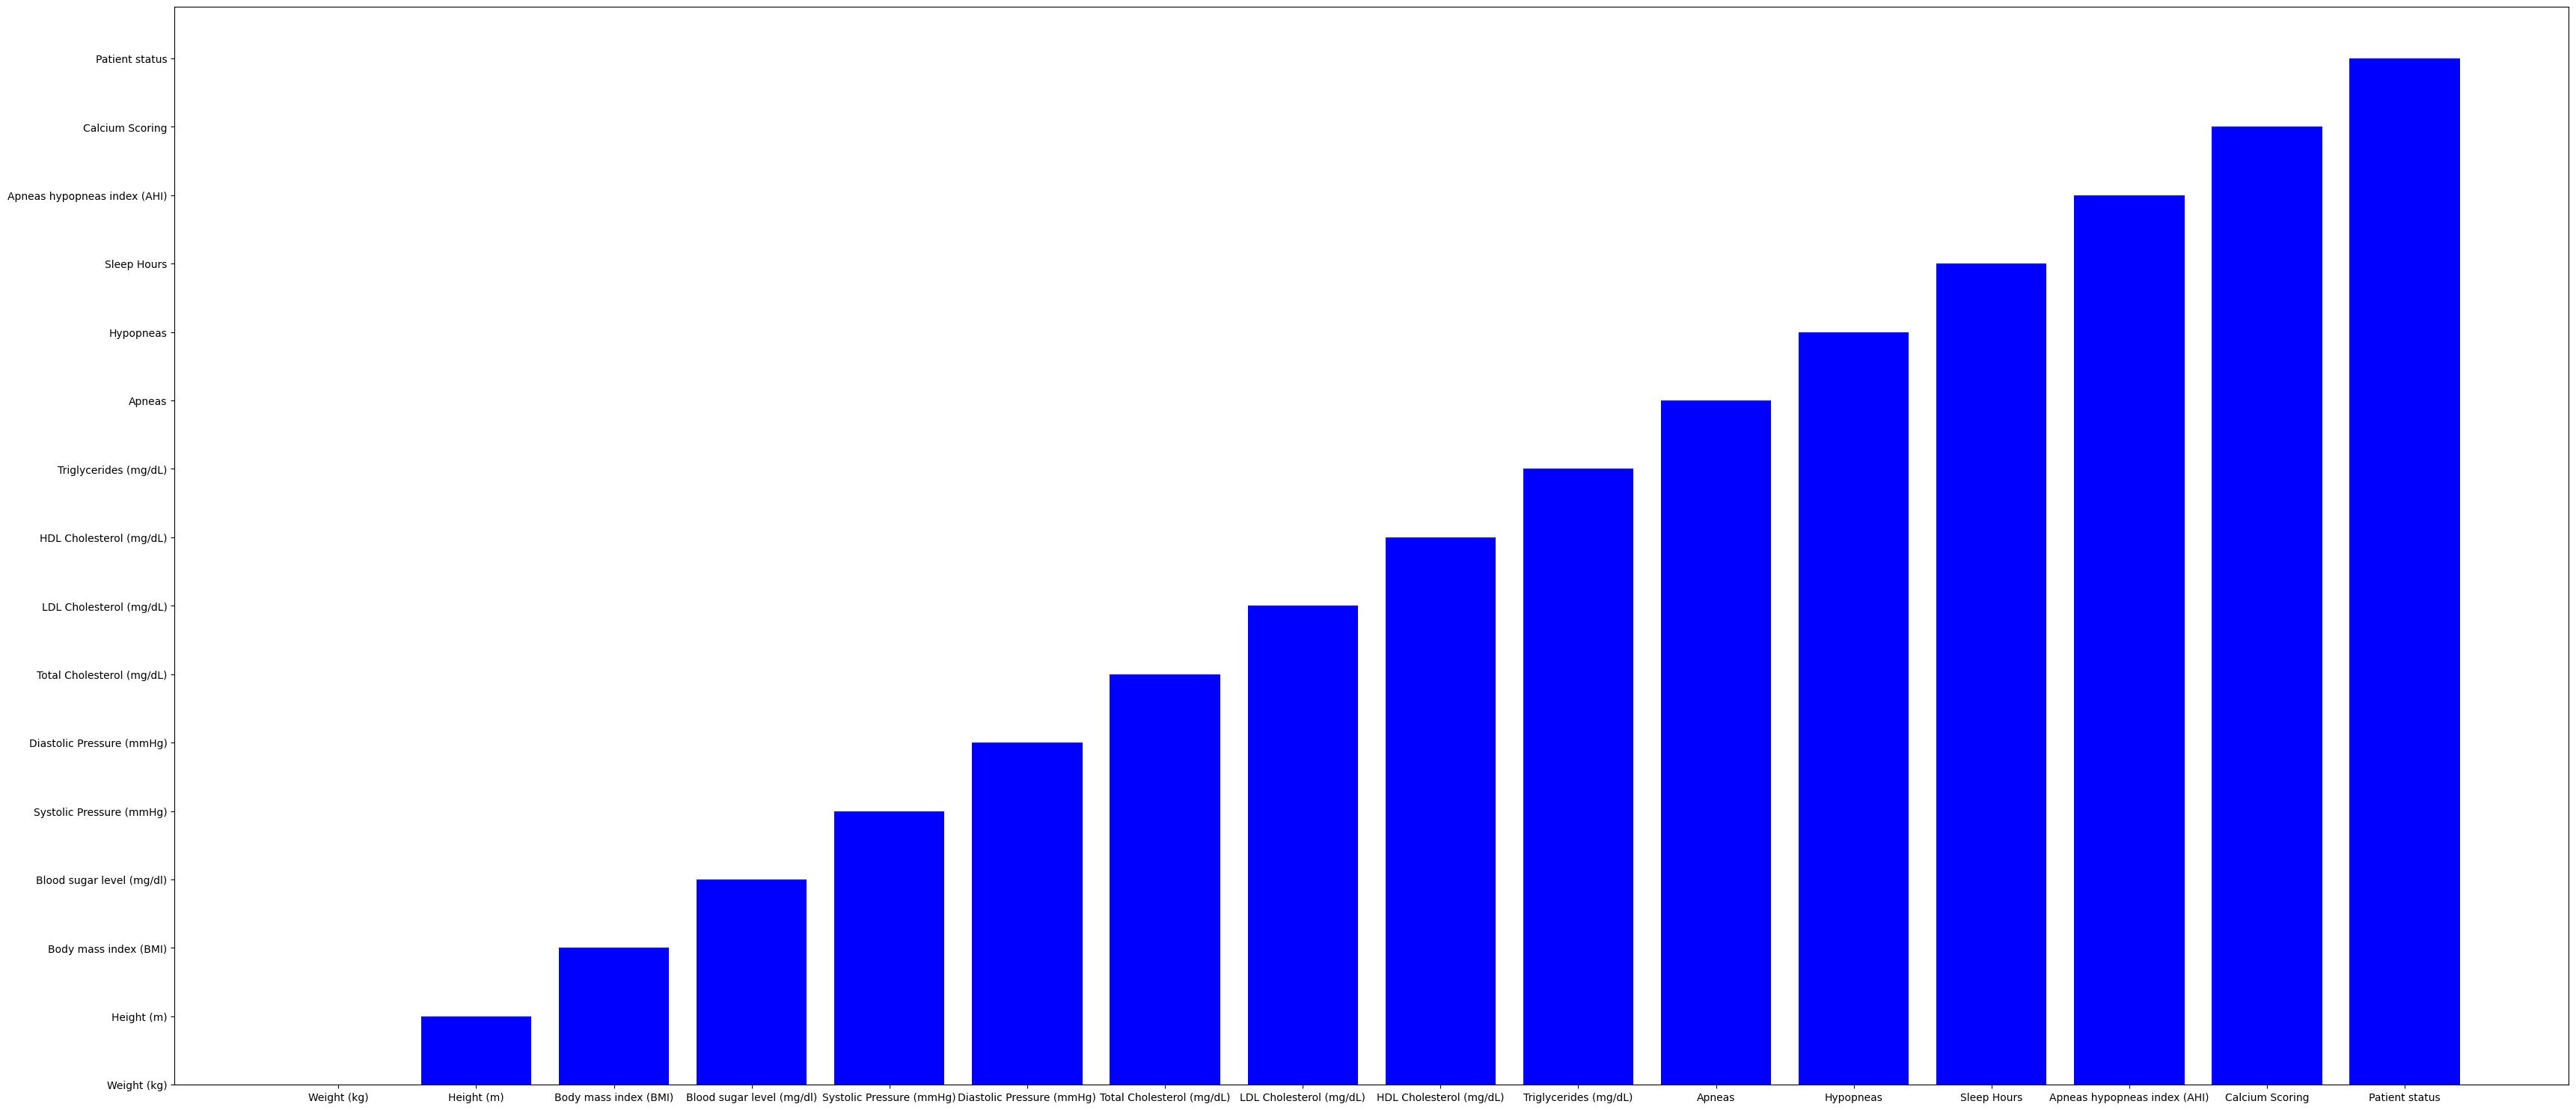

In [652]:
fig = plt.figure()
ax = fig.add_axes([0,0,5,3])
m = list(df.iloc[:0])
n = list(df.iloc[:1])
ax.bar(m,n,color='b')
plt.show()

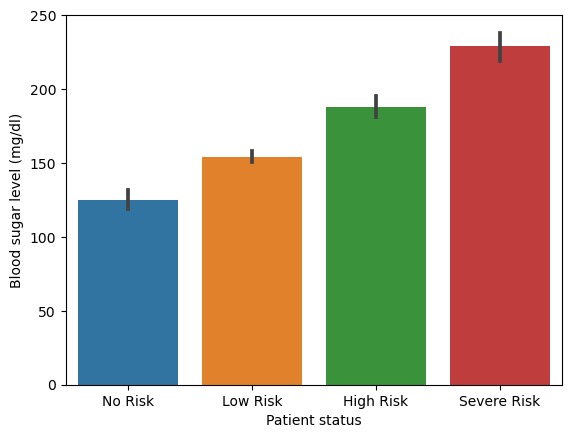

In [653]:
sns.barplot(x="Patient status",y="Blood sugar level (mg/dl)",data=data)
plt.show()

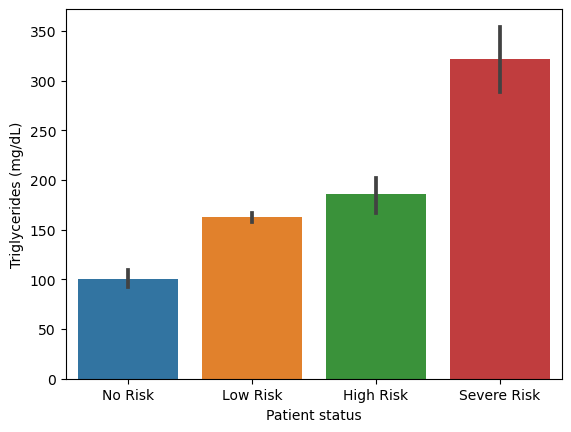

In [654]:
sns.barplot(x="Patient status",y="Triglycerides (mg/dL)",data=data)
plt.show()

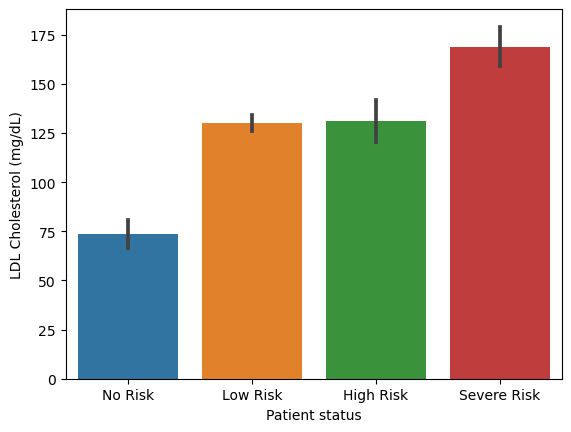

In [655]:
sns.barplot(x="Patient status",y="LDL Cholesterol (mg/dL)",data=data)
plt.show()

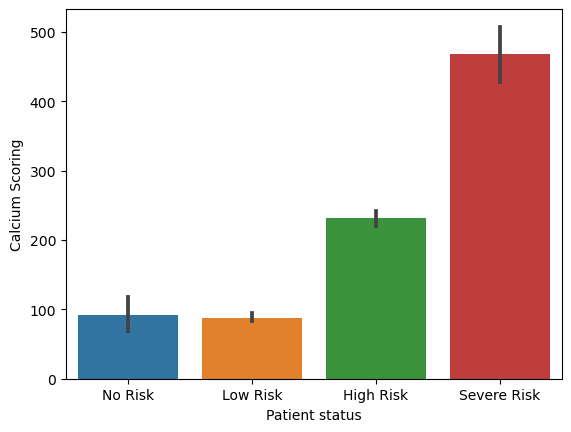

In [656]:
sns.barplot(x="Patient status",y="Calcium Scoring",data=data)
plt.show()

# Describing features and target

In [657]:
data.columns

Index(['Weight (kg)', 'Height (m)', 'Body mass index (BMI)',
       'Blood sugar level (mg/dl)', 'Systolic Pressure (mmHg)',
       'Diastolic Pressure (mmHg)', 'Total Cholesterol (mg/dL)',
       'LDL Cholesterol (mg/dL)', 'HDL Cholesterol (mg/dL)',
       'Triglycerides (mg/dL)', 'Apneas', 'Hypopneas', 'Sleep Hours',
       'Apneas hypopneas index (AHI)', 'Calcium Scoring', 'Patient status'],
      dtype='object')

In [658]:
#features
x = data[['Body mass index (BMI)', 'Blood sugar level (mg/dl)', 'Systolic Pressure (mmHg)', 'Diastolic Pressure (mmHg)', 'LDL Cholesterol (mg/dL)', 'Triglycerides (mg/dL)', 'Apneas hypopneas index (AHI)', 'Calcium Scoring']]

In [659]:
#target
y = data['Patient status']

In [660]:
x.shape

(430, 8)

In [661]:
y.shape

(430,)

In [662]:
data["Patient status"].value_counts()

High Risk      128
Severe Risk    120
Low Risk        95
No Risk         87
Name: Patient status, dtype: int64

In [663]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting dataset into train and test

In [664]:
from sklearn.model_selection import train_test_split

In [665]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.9)

In [666]:
x_train.shape

(387, 8)

In [667]:
x_test.shape

(43, 8)

In [668]:
y_train.shape

(387,)

In [669]:
y_test.shape

(43,)

In [670]:
def binarize_dataframe(y, classes):
  # to convert multi class dataframe to binary dataframe
  # Define the class you want to consider as the positive class (class 0)
    positive_class = 0

# Convert multiclass target variable y into a binary variable
    y_binary = np.where(y == positive_class, 1, 0)
    return y_binary

# CLASSIFICATION PROBLEM (Building Model)

# Logistic Regression

In [671]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)

Train the Model

In [672]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

Predict

In [673]:
y_pred = lr.predict(x_test)

Accuracy

In [674]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_auc_score, roc_curve

In [675]:
accuracy_score(y_test,y_pred)

0.8837209302325582

In [676]:
confusion_matrix = confusion_matrix(y_test,y_pred)

In [677]:
confusion_matrix

array([[11,  0,  0,  2],
       [ 0,  8,  0,  0],
       [ 0,  2,  8,  0],
       [ 1,  0,  0, 11]], dtype=int64)

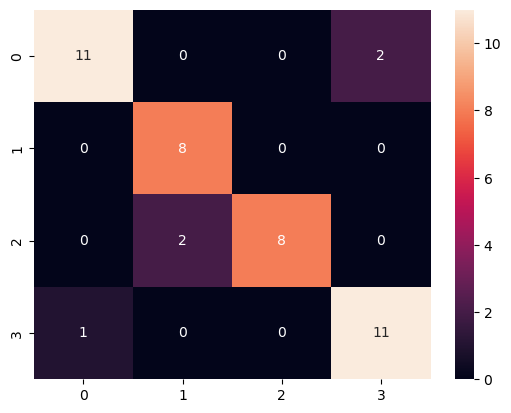

In [678]:
sns.heatmap(confusion_matrix, annot=True)
plt.savefig('h1.png')

#Higher values is represented by darker colors, 
#while lower values is represented by lighter colors.

In [679]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.80      1.00      0.89         8
           2       1.00      0.80      0.89        10
           3       0.85      0.92      0.88        12

    accuracy                           0.88        43
   macro avg       0.89      0.89      0.88        43
weighted avg       0.89      0.88      0.88        43



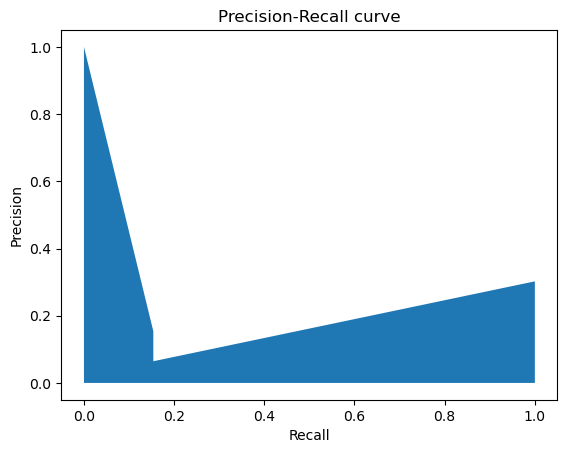

In [680]:
precision, recall, thresholds = precision_recall_curve(binarize_dataframe(y_test,[0,1,2,3]), y_pred)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

In [681]:
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

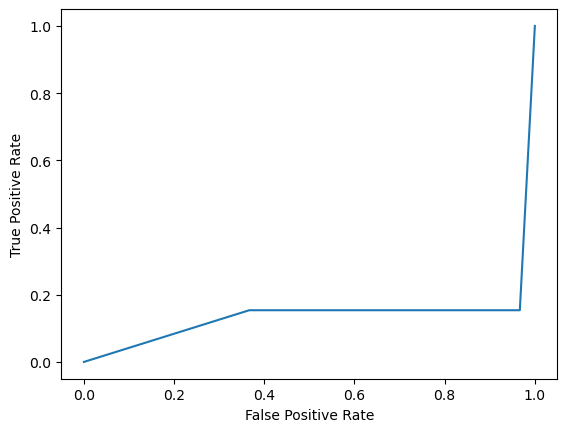

In [682]:
plot_roc_curve(binarize_dataframe(y_test,[0,1,2,3]), y_pred)

# Decision Tree

In [683]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

Train the Model

In [684]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

Predict

In [685]:
y_dt_pred = dtc.predict(x_test)

Accuracy

In [686]:
accuracy_score(y_test,y_dt_pred)

0.9534883720930233

In [687]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_dt_pred)

In [688]:
confusion_matrix

array([[13,  0,  0,  0],
       [ 0,  8,  0,  0],
       [ 0,  2,  8,  0],
       [ 0,  0,  0, 12]], dtype=int64)

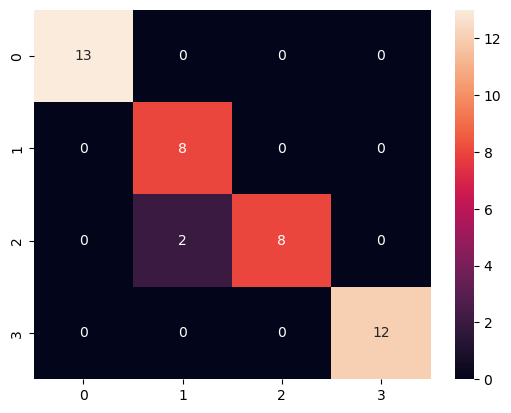

In [689]:
sns.heatmap(confusion_matrix, annot=True)
plt.savefig('h1.png')

#Higher values is represented by darker colors, 
#while lower values is represented by lighter colors.

In [690]:
print(classification_report(y_test,y_dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.80      1.00      0.89         8
           2       1.00      0.80      0.89        10
           3       1.00      1.00      1.00        12

    accuracy                           0.95        43
   macro avg       0.95      0.95      0.94        43
weighted avg       0.96      0.95      0.95        43



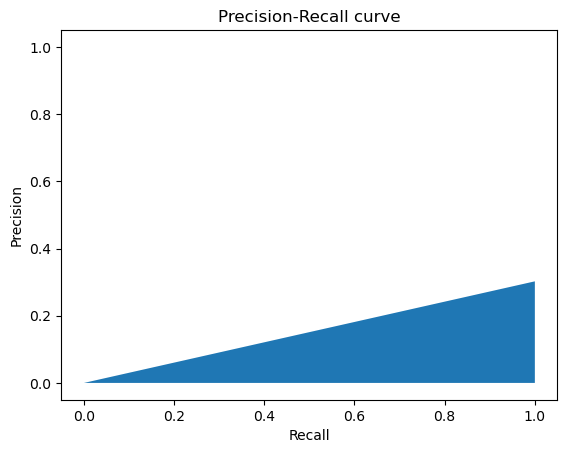

In [691]:
precision, recall, thresholds = precision_recall_curve(binarize_dataframe(y_test,[0,1,2,3]), y_dt_pred)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

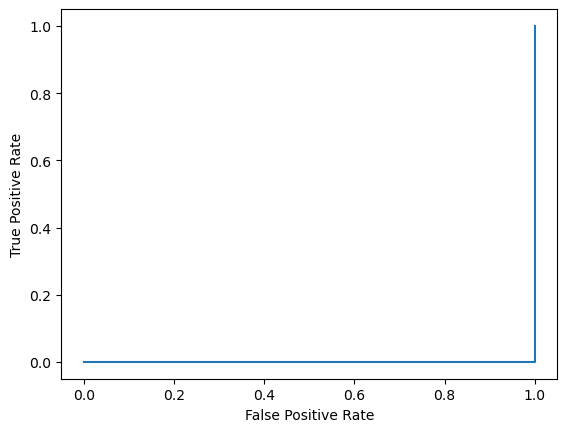

In [692]:
plot_roc_curve(binarize_dataframe(y_test,[0,1,2,3]), y_dt_pred)

# Support Vector Machine (SVM)

In [693]:
from sklearn import svm
sv = svm.SVC(kernel='linear', C=1.0)

Train the Model

In [694]:
sv.fit(x_train, y_train)

SVC(kernel='linear')

Predict

In [695]:
y_sv_pred = sv.predict(x_test)

Accuracy

In [696]:
accuracy_score(y_test,y_sv_pred)

0.9069767441860465

In [697]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_sv_pred)

In [698]:
confusion_matrix

array([[12,  0,  0,  1],
       [ 0,  8,  0,  0],
       [ 0,  2,  8,  0],
       [ 1,  0,  0, 11]], dtype=int64)

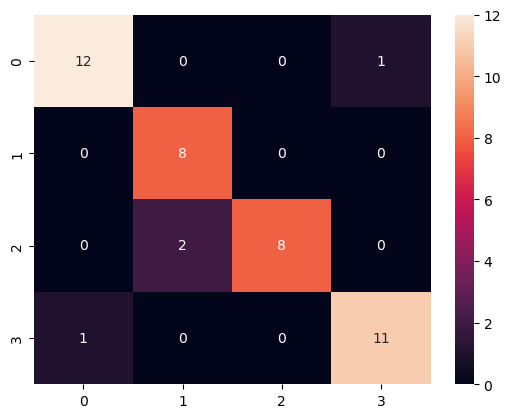

In [699]:
sns.heatmap(confusion_matrix, annot=True)
plt.savefig('h1.png')

#Higher values is represented by darker colors, 
#while lower values is represented by lighter colors.

In [700]:
print(classification_report(y_test,y_sv_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.80      1.00      0.89         8
           2       1.00      0.80      0.89        10
           3       0.92      0.92      0.92        12

    accuracy                           0.91        43
   macro avg       0.91      0.91      0.90        43
weighted avg       0.92      0.91      0.91        43



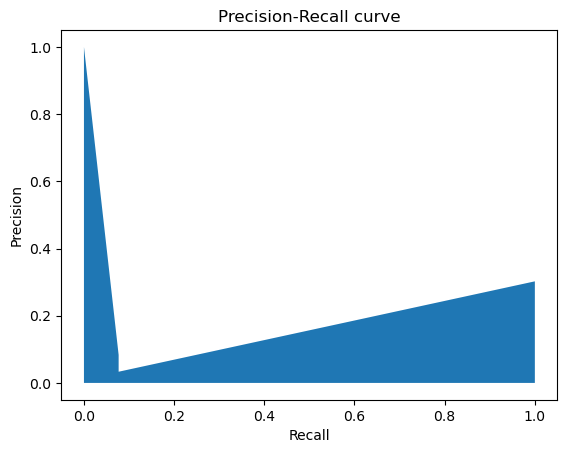

In [701]:
precision, recall, thresholds = precision_recall_curve(binarize_dataframe(y_test,[0,1,2,3]), y_sv_pred)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

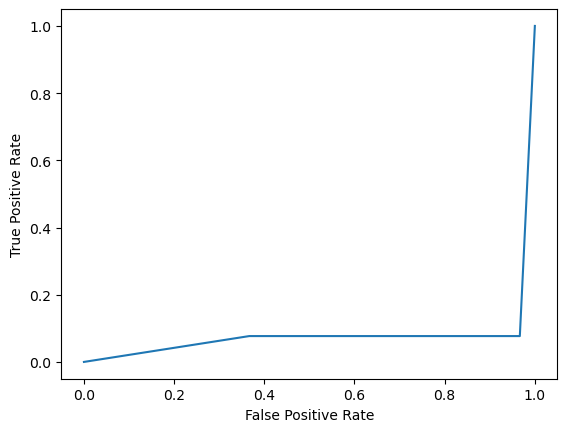

In [702]:
plot_roc_curve(binarize_dataframe(y_test,[0,1,2,3]), y_sv_pred)

# K-Nearest Neighbors (KNN)

In [703]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

Train the Model

In [704]:
knc.fit(x_train, y_train)

KNeighborsClassifier()

Predict

In [705]:
y_kn_pred = knc.predict(x_test)

Accuracy

In [706]:
accuracy_score(y_test,y_kn_pred)

0.9302325581395349

In [707]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_kn_pred)

In [708]:
confusion_matrix

array([[13,  0,  0,  0],
       [ 0,  8,  0,  0],
       [ 0,  2,  8,  0],
       [ 1,  0,  0, 11]], dtype=int64)

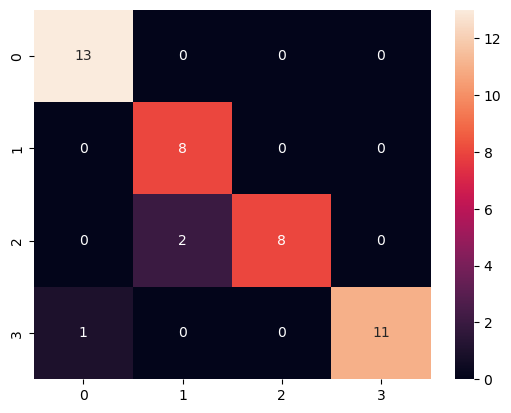

In [709]:
sns.heatmap(confusion_matrix, annot=True)
plt.savefig('h1.png')

#Higher values is represented by darker colors, 
#while lower values is represented by lighter colors.

In [710]:
print(classification_report(y_test,y_kn_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.80      1.00      0.89         8
           2       1.00      0.80      0.89        10
           3       1.00      0.92      0.96        12

    accuracy                           0.93        43
   macro avg       0.93      0.93      0.92        43
weighted avg       0.94      0.93      0.93        43



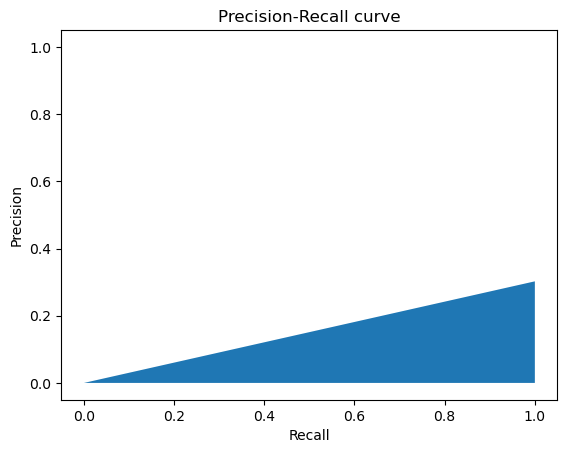

In [711]:
precision, recall, thresholds = precision_recall_curve(binarize_dataframe(y_test,[0,1,2,3]), y_kn_pred)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

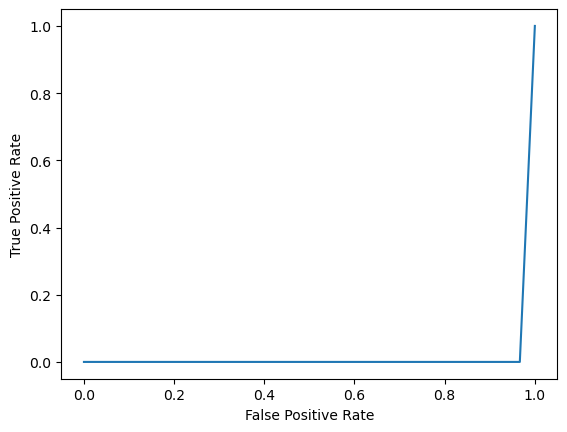

In [712]:
plot_roc_curve(binarize_dataframe(y_test,[0,1,2,3]), y_kn_pred)

# Graphs

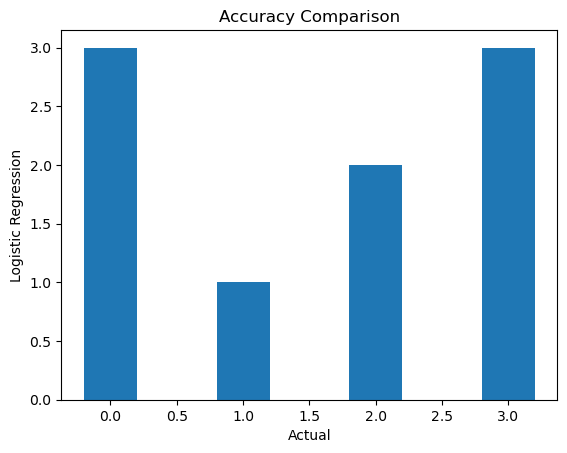

In [713]:
j=0.4
plt.bar(y_test,y_pred,j)
plt.xlabel('Actual')
plt.ylabel('Logistic Regression')
plt.title('Accuracy Comparison')
plt.show()

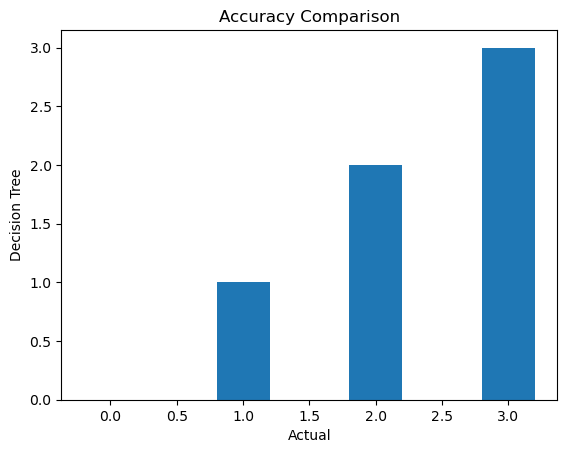

In [714]:
plt.bar(y_test,y_dt_pred,j)
plt.xlabel('Actual')
plt.ylabel('Decision Tree')
plt.title('Accuracy Comparison')
plt.show()

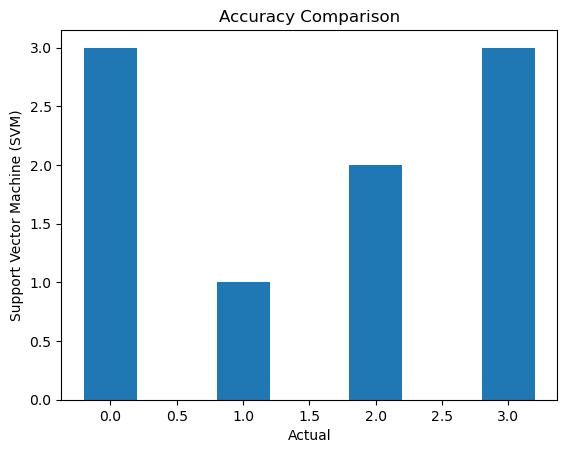

In [715]:
plt.bar(y_test,y_sv_pred,j)
plt.xlabel('Actual')
plt.ylabel('Support Vector Machine (SVM)')
plt.title('Accuracy Comparison')
plt.show()

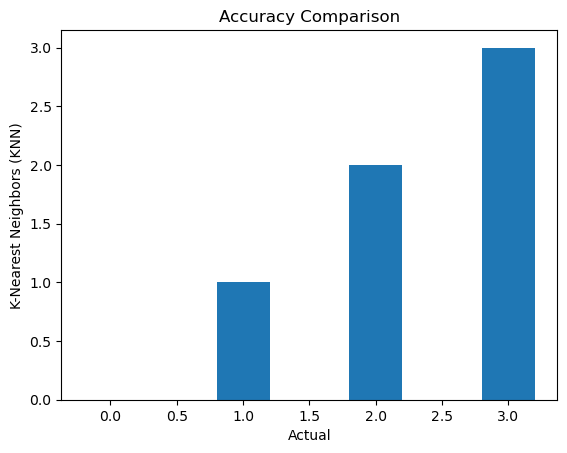

In [716]:
plt.bar(y_test,y_kn_pred,j)
plt.xlabel('Actual')
plt.ylabel('K-Nearest Neighbors (KNN)')
plt.title('Accuracy Comparison')
plt.show()

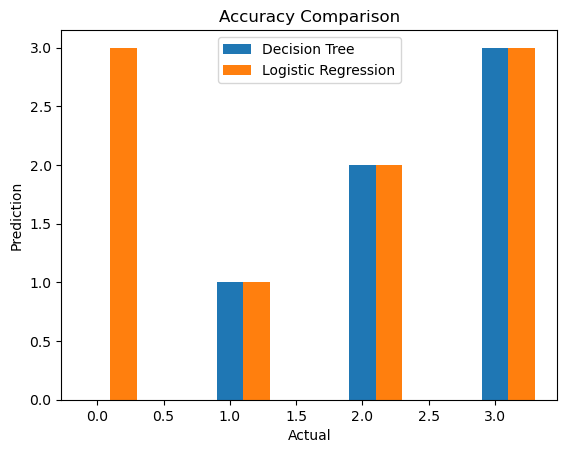

In [717]:
w = 0.2
bar1 = y_test
bar2 = [i+w for i in bar1]

plt.bar(bar1,y_dt_pred,w,label = "Decision Tree")
plt.bar(bar2,y_pred,w,label = "Logistic Regression")

plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()

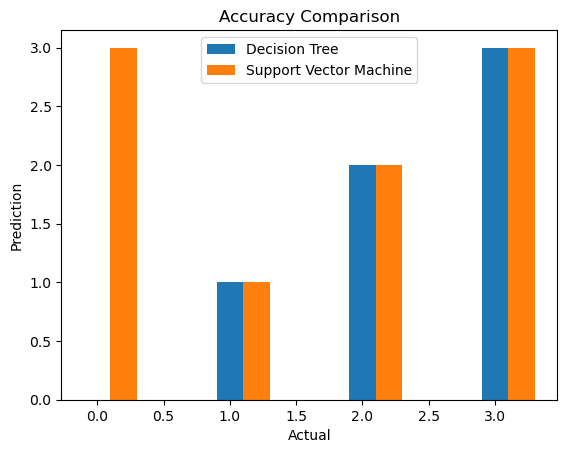

In [718]:
plt.bar(bar1,y_dt_pred,w,label = "Decision Tree")
plt.bar(bar2,y_sv_pred,w,label = "Support Vector Machine")

plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()

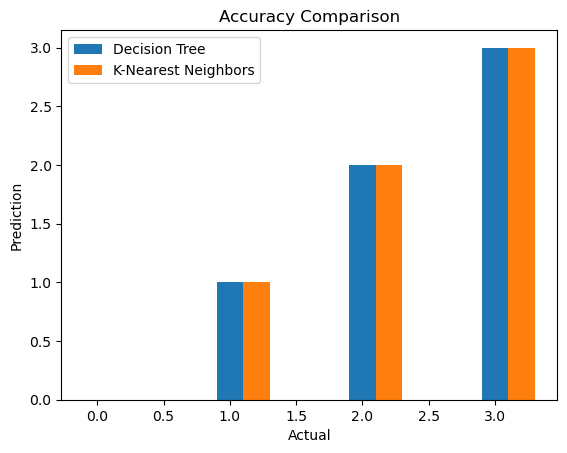

In [719]:
plt.bar(bar1,y_dt_pred,w,label = "Decision Tree")
plt.bar(bar2,y_kn_pred,w,label = "K-Nearest Neighbors")

plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()

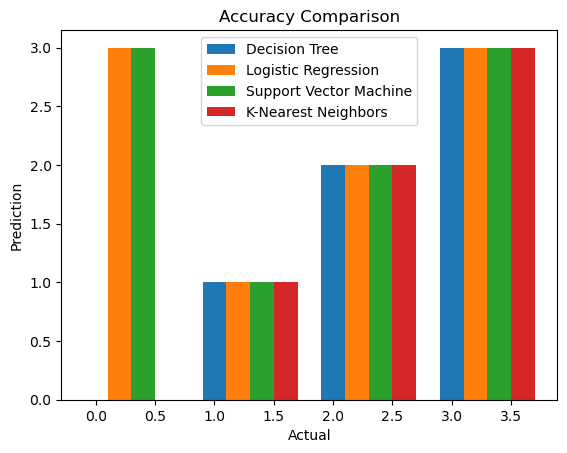

In [720]:
g=0.2
bar3 = [i+w for i in bar2]
bar4 = [i+w for i in bar3]

plt.bar(bar1,y_dt_pred,g,label = "Decision Tree")
plt.bar(bar2,y_pred,g,label = "Logistic Regression")
plt.bar(bar3,y_sv_pred,g,label = "Support Vector Machine")
plt.bar(bar4,y_kn_pred,g,label = "K-Nearest Neighbors")

plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()

In [721]:
# Define and train machine learning models
models = {
    'lr': LogisticRegression(max_iter=10000),
    'dtc': DecisionTreeClassifier(),
    'sv': svm.SVC(kernel='linear', C=1.0),
    'knc': KNeighborsClassifier()
}


In [722]:
# Train the models
for name, model in models.items():
    model.fit(x_train, y_train)

# Example

In [723]:
#'1-Body mass index (BMI)', 
#'2-Blood sugar level (mg/dl)', 
#'3-Systolic Pressure (mmHg)', 
#'4-Diastolic Pressure (mmHg)', 
#'5-LDL Cholesterol (mg/dL)', 
#'6-Triglycerides (mg/dL)', 
#'7-Apneas hypopneas index (AHI)', 
#'8-Calcium Scoring'

user_input = np.array([[50 ,190, 110, 90, 88, 125, 5, 0 ]])


In [724]:
# Predict risk level using each model
predictions = {}
for name, model in models.items():
    prediction = model.predict(user_input)
    predictions[name] = prediction[0]

# Map predicted labels to risk levels
risk_levels = {
    0: 'No Risk',
    1: 'Low Risk',
    2: 'High Risk',
    3: 'Severe Risk'
}

# Display predictions
for name, prediction in predictions.items():
    print(f"{name}: {risk_levels[prediction]}")

#lr- logistic regression
#dtc- decision tree
#sv- SVM
#knc- KNN

lr: Low Risk
dtc: No Risk
sv: High Risk
knc: High Risk
